In [1]:
import pandas as pd
import plotly.express as px
import datetime
from IPython.display import HTML

In [2]:
!ls

20210410_generated_users.csv model.tflite
Visualisation.ipynb          start.py
fakedatavis                  testout


In [3]:
dt = pd.read_csv('20210410_generated_users.csv')

In [4]:
len(dt)

10000

In [5]:
dt['Birthdate_dt'] = dt['Birthdate'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
dt = dt[dt['Birthdate_dt'] < '2003-05-25']
len(dt)

8431

In [11]:
dt.head()

,Lat,Lon,Suburb,Country,Timezone,Txt,Birthdate,Name,Job,Goals,RetailInvestor,Birthdate_dt
0,-34.88422,150.60036,Nowra,AU,Australia/Sydney,Factor find long computer store.,1958-12-31,Donna Hammond,Media planner,"['G2', 'G1', 'G7', 'G3']",N,1958-12-31
1,-38.16604,145.13643,Frankston South,AU,Australia/Melbourne,Moment south world too each race cell.,1914-09-29,Jeremy Campos,Architect,[],N,1914-09-29
2,-33.79176,151.08057,Eastwood,AU,Australia/Sydney,Central old early history time black Mr must.,1922-01-05,Stephanie Sanders,"Nurse, children's","['G7', 'G17', 'G11', 'G16']",N,1922-01-05
6,-38.16604,145.13643,Frankston South,AU,Australia/Melbourne,Media rock son gun sometimes action.,1990-06-20,Roger Clark,"Conservator, museum/gallery","['G12', 'G11', 'G3', 'G14', 'G15', 'G6']",N,1990-06-20
7,-33.75881,150.99292,Baulkham Hills,AU,Australia/Sydney,Personal break matter soldier through.,1906-11-19,Benjamin Robinson,Fashion designer,"['G5', 'G1', 'G13']",Y,1906-11-19


## Timezone

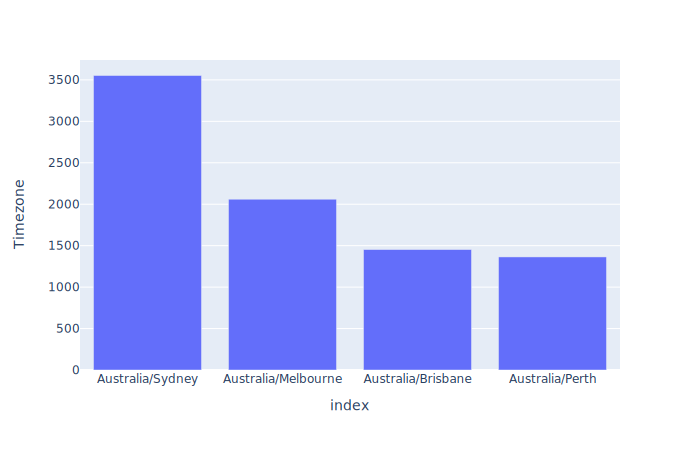

In [14]:
fig = px.bar(pd.DataFrame(dt['Timezone'].value_counts()),  y='Timezone')
fig.show(renderer="svg")

# Age

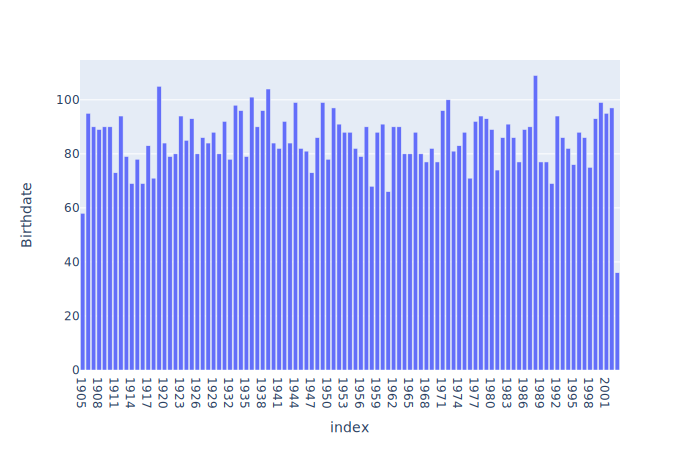

In [13]:
fig = px.bar(pd.DataFrame(dt['Birthdate'].str[0:4].value_counts().sort_index()),  y='Birthdate')
fig.show(renderer="svg")

# Retail Investor

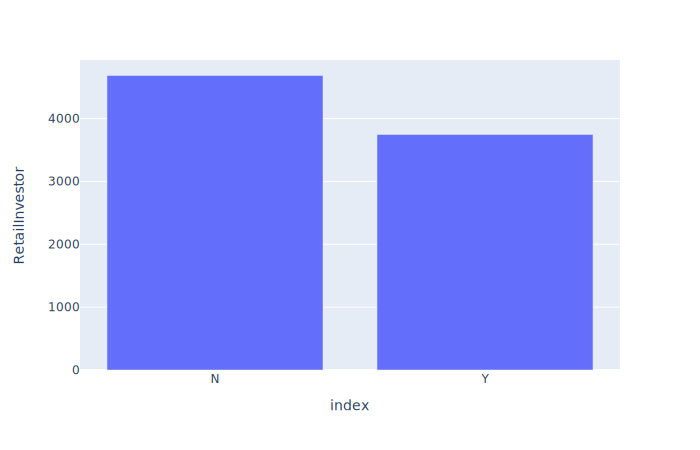

In [15]:
fig = px.bar(pd.DataFrame(dt['RetailInvestor'].value_counts().sort_index()),  y='RetailInvestor')
fig.show(renderer="svg")

# Goals

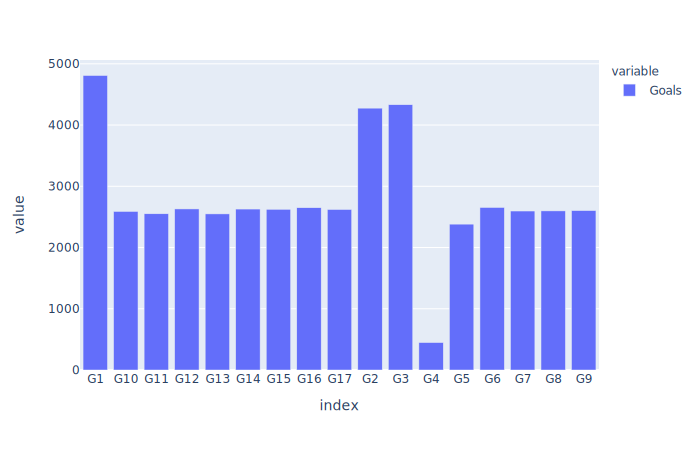

In [16]:

fig = px.bar(pd.DataFrame(dt['Goals'].apply(lambda x: eval(x)).explode().value_counts().sort_index()))
fig.show(renderer="svg")

# Location

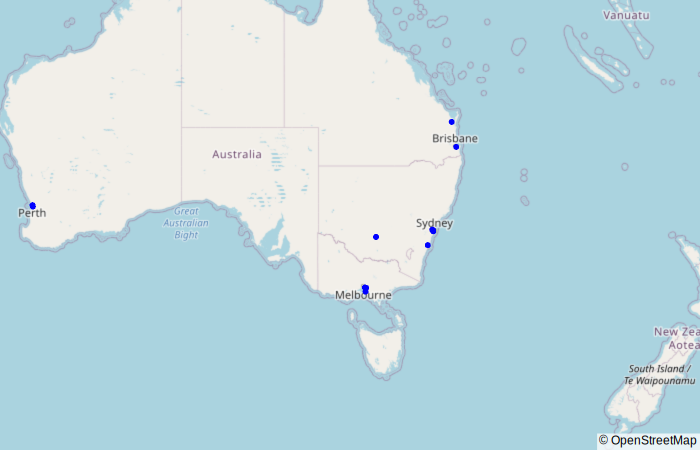

In [21]:
fig = px.scatter_mapbox(dt, lat="Lat", lon="Lon", hover_name="Suburb", hover_data=["Timezone", "Job"],
                        color_discrete_sequence=["blue"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show(renderer="svg")

# Job

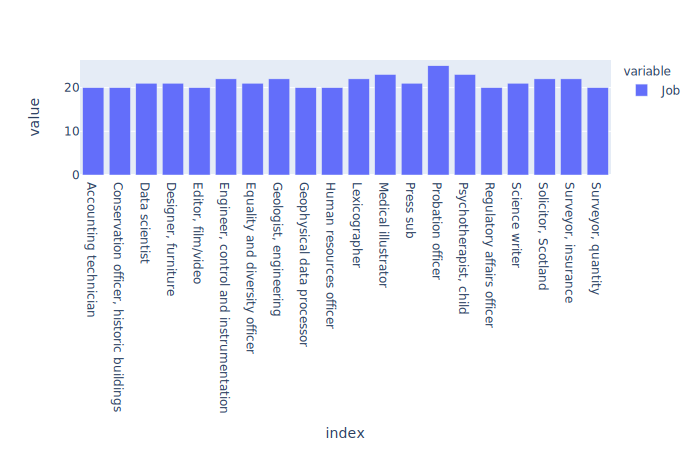

In [22]:
fig = px.bar(pd.DataFrame(dt['Job'].value_counts().head(20).sort_index()))
fig.show(renderer="svg")